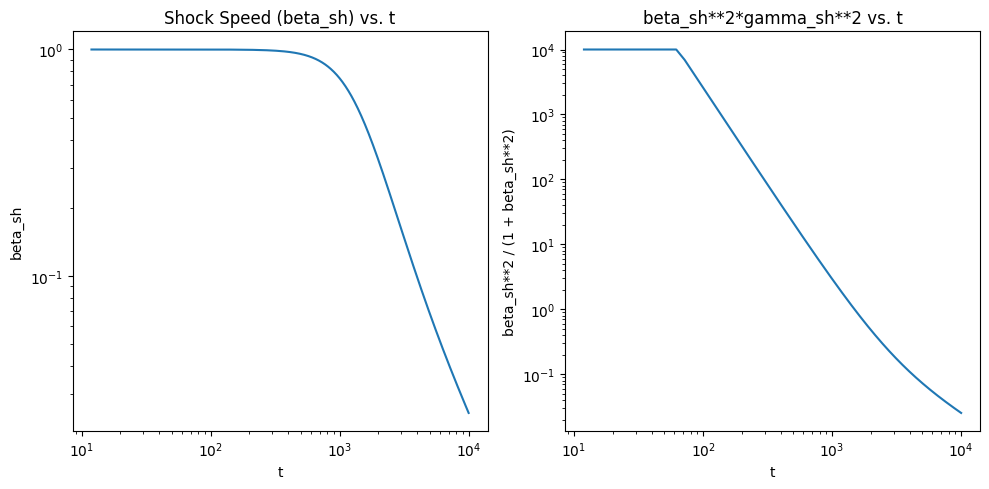

In [33]:
#nous nous interressons ici au comportement de l'onde de choc (partie 2.1.1) de l'article. 

import numpy as np
import matplotlib.pyplot as plt
from scipy import *
from scipy.integrate import odeint
import math as m 




tetav=0
phi=5
c=3*10**8
mp = 1.67e-27
sh_max=100
teta=5
E=10**43
n0=10**(3)   #let's say 1 particle by cubic cm
mu=m.sin(teta)*m.sin(tetav)*m.cos(phi)+m.cos(teta)*m.cos(tetav)


def C_BM(E, n0, mp, c):
    return np.sqrt(17 * E / (8 * np.pi * n0 * mp * c**5))

def C_ST(E, n0, mp, c):
    return (2/5) * 1.15 * (E / (n0 * mp * c**5))**(1/5)


C_BM_val = C_BM(E,n0,mp,c)
C_ST_val = C_ST(E,n0,mp,c)
#je dérivé l'équation 4, je remplace betash par une fonction de R grâce à l'équation 1 (en remplacant t par T+mu*R/c) on obtient une équa diff sur R que l'on résoud ici

def radius(T, mu, c):
    def f(R,t):
        mine = np.minimum((C_BM_val**2) * (T + mu * R / c) ** (-3) + (C_ST_val**2) * (T + mu * R / c) ** (-6 / 5), sh_max**2)
        return np.sqrt(mine / (1 + mine)) * c  
    
    Rp = 0
    Rs = 1e15
    while abs(Rp - Rs) > 10 ** (-2):
        sol = odeint(f, [0, Rs], [0, T])
        Rp = Rs
        Rs = sol[0][1]
    return Rs
#une fois R déterminé on a t=T+mu*R/c l'équation 1 nous donne alors beta sh donc la vitesse de l'onde de choc
    
def shock_speed(C_BM, C_ST, sh_max,T):
    t=T+mu*radius(T,mu,c)/c
    mine=min((C_BM(E, n0, mp, c)**2) * (t)**(-3) + (C_ST(E, n0, mp, c)**2) * (t)**(-6/5), sh_max**2)
    beta_sh=np.sqrt(mine/(1+mine))
    return beta_sh
    
#tracé de betash et betash**2* gamma_sh**2 en fonction de petit t que je définis à partir de T
T_values=np.linspace(10**(-0)*86400,10**4*86400,1000)
t_values = [(T + mu * radius(T, mu, c) / c) for T in T_values]
#t_values=np.linspace(10**(-2)*86400,10**2*86400,1000)
t_valuesday=np.array(t_values)/86400
beta_sh_values = [shock_speed(C_BM, C_ST, sh_max,T) for t,T in zip(t_values,T_values)]

beta_sh_ratio_values = [beta_sh**2 / (1 - beta_sh**2) for beta_sh in beta_sh_values]



plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(t_valuesday, np.array(beta_sh_values)**2)
plt.yscale('log') 
plt.xscale('log') 
plt.xlabel('t')
plt.ylabel('beta_sh')
plt.title('Shock Speed (beta_sh) vs. t')

plt.subplot(1, 2, 2)
plt.plot(t_valuesday, beta_sh_ratio_values)
plt.xlabel('t')
plt.yscale('log') 
plt.xscale('log') 
plt.ylabel('beta_sh**2 / (1 + beta_sh**2)')
plt.title('beta_sh**2*gamma_sh**2 vs. t')

plt.tight_layout()
#plt.show()


C:\Users\charl\AppData\Local\Temp\ipykernel_14692\3420784451.py:32: RuntimeWarning: divide by zero encountered in power
  mine = np.minimum((C_BM_val**2) * (T + mu * R / c) ** (-3) + (C_ST_val**2) * (T + mu * R / c) ** (-6 / 5), sh_max**2)


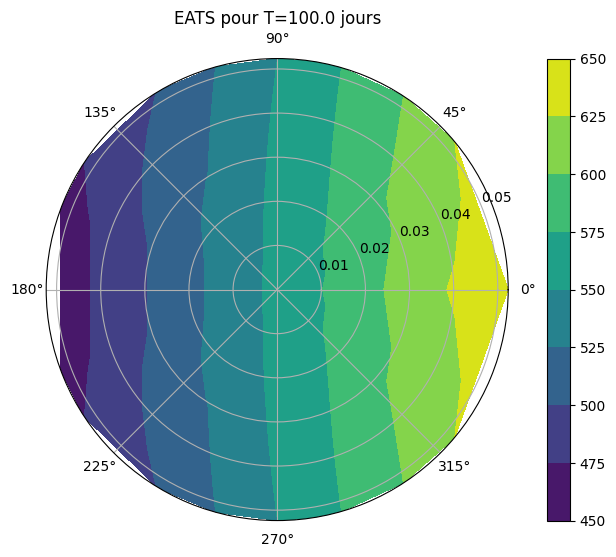

In [2]:
#on s'interresse maintenant à l'EATS


import numpy as np
import matplotlib.pyplot as plt
from scipy import *
from scipy.integrate import odeint
import math as m 


tetav=20*3.14/180
c=3*10**8
mp = 1.67e-27
sh_max=100
E=10**43
n0=10**(3)   #let's say 1 particle by cubic cm


def C_BM(E, n0, mp, c):
    return np.sqrt(17 * E / (8 * np.pi * n0 * mp * c**5))

def C_ST(E, n0, mp, c):
    return (2/5) * 1.15 * (E / (n0 * mp * c**5))**(1/5)


C_BM_val = C_BM(E,n0,mp,c)
C_ST_val = C_ST(E,n0,mp,c)


def radius(T, mu, c):
    def f(R,time):
        mine = np.minimum((C_BM_val**2) * (T + mu * R / c) ** (-3) + (C_ST_val**2) * (T + mu * R / c) ** (-6 / 5), sh_max**2)
        return np.sqrt(mine / (1 + mine)) * c
    
    Rp = -T*c/mu
    Rs = 1e25
    cpt = 0
    while abs(Rp - Rs)/abs(Rs) > 10 ** (-2) and cpt < 20:
        cpt += 1
        #print(Rs)
        time1 = [0,T+mu*Rs/c]
        sol = odeint(f,y0=[-T*c/mu], t=time1)
        Rp = Rs
        Rs = sol[1][0]
    return Rs

    
def shock_speed(C_BM, C_ST, sh_max,T):
    t=T+mu*abs(radius(T,mu,c))/c
    mine=min((C_BM(E, n0, mp, c)**2) * (t)**(-3) + (C_ST(E, n0, mp, c)**2) * (t)**(-6/5), sh_max**2)
    beta_sh=np.sqrt(mine/(1+mine))
    return beta_sh

#pour un T fixé sur Terre, l'observateur reçoit des photons de différents points de passage de l'onde de choc. Les points sont repérés en coordonnées polaires
#par teta phi et teta v, il s'agit de savoir en quel t l'onde de choc passe en un point de coordonnées (tetav,teta,phi) et émet un photon reçu en T sur terre
# Définition de la grille en theta et phi
phi_values = np.linspace(0, 2 * np.pi, 10)
theta_values = np.linspace(0, 3*np.pi/180, 10)  #angle d ouverture du jet borné à 3 deg
phi_grid, theta_grid = np.meshgrid(phi_values, theta_values)

# Choix de la valeur de T
T = 8640000
# Calcul des valeurs de t pour chaque point de la grille
t_values = np.zeros_like(phi_grid)
r_values = np.zeros_like(phi_grid)
nb_pt_traite = 0
for i in range(len(phi_values)):
    for j in range(len(theta_values)):
        nb_pt_traite += 1
        mu = np.sin(theta_values[j]) * np.sin(tetav) * np.cos(phi_values[i]) + np.cos(theta_values[j]) * np.cos(tetav)
        R_values = radius(T, mu, c)
        r_values[j, i] = R_values 
        
        t_values[j, i] = T + mu * R_values / c
        if nb_pt_traite%1000==0:
            print(nb_pt_traite/100)
            print(mu)
t_values = t_values/86400
# Tracé de la grille en coordonnées sphériques (theta, phi) avec les valeurs de t en code couleur
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='polar')
plt.title(f"EATS pour T={T/(3600*24)} jours")
im=ax.contourf(phi_grid,theta_grid,t_values)
fig.colorbar(im)

C:\Users\charl\AppData\Local\Temp\ipykernel_17360\643146795.py:32: RuntimeWarning: divide by zero encountered in power
  mine = np.minimum((C_BM_val**2) * (T + mu * R / c) ** (-3) + (C_ST_val**2) * (T + mu * R / c) ** (-6 / 5), sh_max**2)


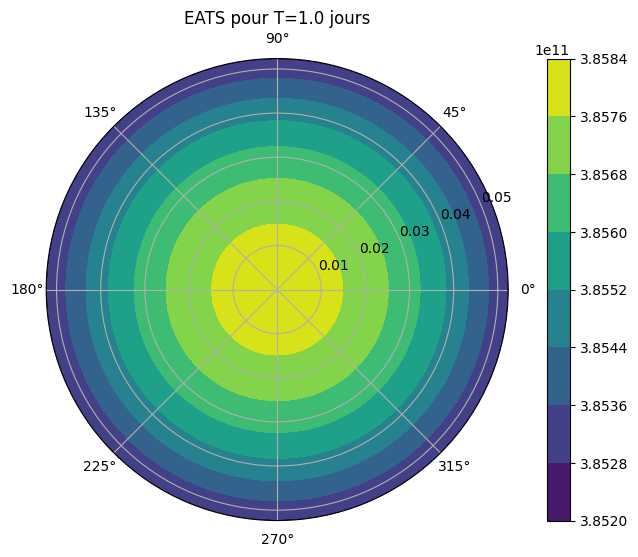

In [1]:
#on s'interresse maintenant à l'EATS


import numpy as np
import matplotlib.pyplot as plt
from scipy import *
from scipy.integrate import odeint
import math as m 


tetav=0*3.14/180
c=3*10**8
mp = 1.67e-27
sh_max=100
E=10**43
n0=10**(3)   #let's say 1 particle by cubic cm


def C_BM(E, n0, mp, c):
    return np.sqrt(17 * E / (8 * np.pi * n0 * mp * c**5))

def C_ST(E, n0, mp, c):
    return (2/5) * 1.15 * (E / (n0 * mp * c**5))**(1/5)


C_BM_val = C_BM(E,n0,mp,c)
C_ST_val = C_ST(E,n0,mp,c)


def radius(T, mu, c):
    def f(R,t):
        mine = np.minimum((C_BM_val**2) * (T + mu * R / c) ** (-3) + (C_ST_val**2) * (T + mu * R / c) ** (-6 / 5), sh_max**2)
        return np.sqrt(mine / (1 + mine)) * c  
    
    Rp = -T*c/mu
    Rs = 1e25
    while abs(Rp - Rs) > 10 ** (-2):
        sol = odeint(f, [-T*c/mu, Rs], [0, T])
        Rp = Rs
        Rs = sol[0][1]
    return Rs

    
def shock_speed(C_BM, C_ST, sh_max,T):
    t=T+mu*radius(T,mu,c)/c
    mine=min((C_BM(E, n0, mp, c)**2) * (t)**(-3) + (C_ST(E, n0, mp, c)**2) * (t)**(-6/5), sh_max**2)
    beta_sh=np.sqrt(mine/(1+mine))
    return beta_sh

#pour un T fixé sur Terre, l'observateur reçoit des photons de différents points de passage de l'onde de choc. Les points sont repérés en coordonnées polaires
#par teta phi et teta v, il s'agit de savoir en quel t l'onde de choc passe en un point de coordonnées (tetav,teta,phi) et émet un photon reçu en T sur terre
# Définition de la grille en theta et phi
phi_values = np.linspace(0, 2 * np.pi, 100)
theta_values = np.linspace(0, 3*np.pi/180, 100)  #angle d ouverture du jet borné à 3 deg
phi_grid, theta_grid = np.meshgrid(phi_values, theta_values)

# Choix de la valeur de T
T = 86400
# Calcul des valeurs de t pour chaque point de la grille
t_values = np.zeros_like(phi_grid)
r_values = np.zeros_like(phi_grid)
for i in range(len(phi_values)):
    for j in range(len(theta_values)):
        mu = np.sin(theta_values[j]) * np.sin(tetav) * np.cos(phi_values[i]) + np.cos(theta_values[j]) * np.cos(tetav)
        R_values = radius(T, mu, c)
        r_values[j, i] = R_values 
        t_values[j, i] = T + mu * R_values / c
t_values = t_values/86400
# Tracé de la grille en coordonnées sphériques (theta, phi) avec les valeurs de t en code couleur
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='polar')
plt.title(f"EATS pour T={T/(3600*24)} jours")
im=ax.contourf(phi_grid,theta_grid,t_values)
fig.colorbar(im)

